In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import pywt

In [2]:
data_y = pd.read_csv('../Data/raw_y.csv', index_col = 0)
data_y.head(3)

,index,id,name,weekend,hacha,max_ride,min_ride,pattern
0,0,6,가락시장,0,0,2352.0,63.4,"[0.08485537009525475, 0.2041422703836407, 0.64..."
1,1,7,송파,0,0,1710.6,12.0,"[0.07229483103732487, 0.24137525020605205, 0.8..."
2,2,8,문정,0,0,5700.4,53.8,"[0.0076860411575107165, 0.052385506322388704, ..."


In [3]:
# DWT Transforming Test
wFamilies = ['haar', 'db1', 'db2', 'db4', 'sym2', 'sym3', 'sym4', 'coif1', 'coif2', 'bior1.1', 'bior1.3']
diffs = {}
for w in wFamilies:
    diffs[w] = 0

def str_to_arr(x):
    return np.array([float(i) for i in x[1:-1].split(',')])

for k, v in data_y.iterrows():
    pattern = str_to_arr(v['pattern'])
    for waveform in wFamilies:
        w = pywt.Wavelet(waveform)
        cA, cD = pywt.dwt(pattern, wavelet= w)
        recon0 = pywt.idwt(cA, cD, wavelet = w)
        recon1 = pywt.idwt(cA, None, wavelet = w)
        diff = np.abs(recon0 - recon1)
        sum_dff = np.sum(diff) #Get difference bewteen original wave and reconstructed signal with only cA
        sum_total = np.sum(recon0)
        temp = diffs[waveform]
        diffs[waveform] = temp + sum_dff/sum_total
diffs

{'haar': 140.0370253716727,
 'db1': 140.0370253716727,
 'db2': 83.61489199837081,
 'db4': 100.64460033595472,
 'sym2': 83.61489199831689,
 'sym3': 84.02191353355829,
 'sym4': 113.61357282336003,
 'coif1': 127.75682019050238,
 'coif2': 117.24253037741455,
 'bior1.1': 140.0370253716727,
 'bior1.3': 141.83045032899875}

In [19]:
len(cA)

12

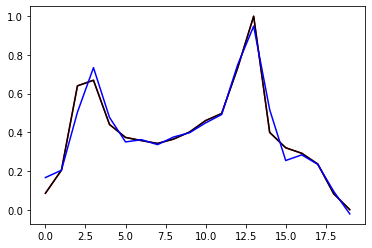

In [15]:
w = pywt.Wavelet('db2')

for k, v in data_y[:1].iterrows():
    pattern = str_to_arr(v['pattern'])
    #w = pywt.Wavelet(waveform)
    cA, cD = pywt.dwt(pattern, wavelet= w)
    recon0 = pywt.idwt(cA, cD, wavelet = w)
    recon1 = pywt.idwt(cA, None, wavelet = w)
    plt.plot(pattern, color = 'red')
    plt.plot(recon0, color = 'black')
    plt.plot(recon1, color = 'blue')
plt.show()

In [20]:
for k, v in data_y.iterrows():
    pattern = str_to_arr(v['pattern'])
    w = pywt.Wavelet('db2')
    cA, cD = pywt.dwt(pattern, wavelet= w)
    data_y.at[k, 'cA'] = str(cA)
    data_y.at[k, 'cD'] = str(cD)
data_y.to_csv('../Data/train_y.csv')